In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
import pickle

In [4]:
def parse_timestamp(timestamp):
    timestamp = float(timestamp)
    timestamp /= 1000.0
    timestamp = int(timestamp)
    return timestamp

In [8]:
def process_chunk(chunk):
    for row in chunk.itertuples():
        user = row.user_id
        x = row.x
        y = row.y
        if (x,y) in s:
            if (x,y) in pixel:
                pixel[(x,y)].append(user)
            else: 
                pixel[(x,y)] = [user]

### using amongi detected coordinates
I use amongi detected coordinate using find amongi to pair amongi_pixel and users that modified that pixel

In [5]:
with open('output/nonzero_coords_amongi.pickle', 'rb') as handle:
    among_pos = pickle.load(handle)

In [6]:
coords = []
for key in among_pos:
    x = among_pos[key][0]
    y = among_pos[key][1]
    for xc,yc in zip(x,y):
        coords.append((xc,yc))
len(coords)

178811

In [ ]:
#df.sort_values("timestamp", inplace=True, ignore_index=True)

In [10]:
CHUNK_SIZE = 1_000_000
pixel = {}
#f = open("data.txt", "w")
s = set(coords)

with pd.read_csv(
        'reddit_place_2022_trimmed.csv',
        #converters={"timestamp": parse_timestamp,}, non dovrebbe piu servire
        chunksize=CHUNK_SIZE,
        engine="c",
        #dtype={'timestamp':np.uint32,
        #  'user_id':np.uint32,
        #  'pixel_color':np.uint8,
        #  'x':np.uint16,
        #  'y':np.uint16,}
    ) as csv:
        for chunk in tqdm(csv):
            process_chunk(chunk)
            
#f.close()

with open('output/dict_coords_amongi_user.pickle', 'wb') as handle:
    pickle.dump(pixel, handle, protocol=pickle.HIGHEST_PROTOCOL)

0it [00:00, ?it/s]

KeyboardInterrupt: 

usando l ottimizzazione dei dtypes con pd.readcsv ci  ha messo 2'55
senza l ottimizzazione dei dtypes con pd.readcsv ci ha messo 
 
probabilmente non cambia tanto il tempo ma quanta memoria occupa credo

### just pair pixel and user with no criterions
all pixel paired with users

In [12]:
def process_chunk_general(chunk):
    for row in chunk.itertuples():
        user = row.user_id
        x = row.x
        y = row.y
        if (x,y) in pixel:
            pixel[(x,y)].append(user)
        else: 
            pixel[(x,y)] = [user]

In [ ]:
def process_chunk_write_file(chunk):
    for row in chunk.itertuples():
        user = row.user_id
        x = row.x
        y = row.y
        if (x,y) in s:
            f.write(str(x) + "," + str(y) + "," + str(user) + '\n')

In [ ]:
CHUNK_SIZE = 1_000_000
pixel = {}
#f = open("data_general.txt", "w")

with pd.read_csv(
        'reddit_place_2022_trimmed.csv',
        chunksize=CHUNK_SIZE,
        engine="c",
        dtype={'timestamp':np.uint32,
              'user_id':np.uint32,
              'pixel_color':np.uint8,
              'x':np.uint16,
              'y':np.uint16,}
    ) as csv:
        for chunk in tqdm(csv):
            process_chunk_general(chunk)
            
#f.close()

0it [00:00, ?it/s]

In [ ]:
with open('output/dict_coords_user.pickle', 'wb') as handle:
    pickle.dump(pixel, handle, protocol=pickle.HIGHEST_PROTOCOL)

# amongi analysis

In [3]:
with open('output/dict_coords_amongi_user.pickle', 'rb') as handle:
    pixel = pickle.load(handle)

In [4]:
len(pixel.keys())

34203

In [5]:
among_pixels = list(pixel.keys())
among_pixels[0]

(1856, 1241)

In [6]:
pixel[(1856, 1241)]

[30,
 340684,
 1299525,
 1143869,
 2210359,
 1760811,
 11872,
 1630461,
 2876251,
 330761,
 615107,
 1354989,
 3137,
 4526,
 613922,
 998945]

In [7]:
img = np.zeros((2000,2000))
for pixel in among_pixels:
    x,y = pixel
    img[x,y] = 1


In [8]:
%matplotlib widget


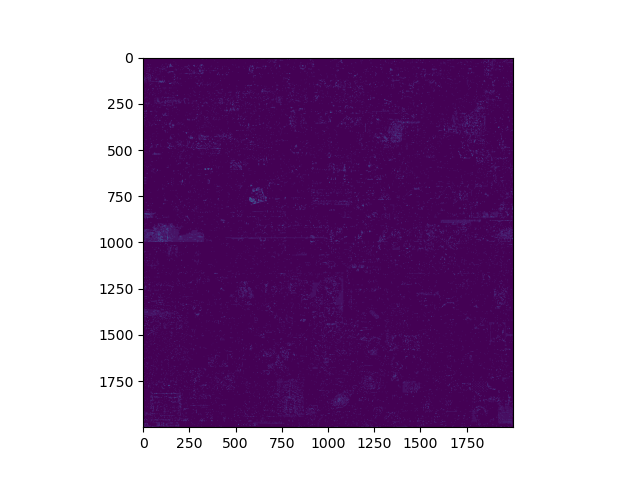

In [9]:
import plotly.express as px
#plt.rcParams['figure.figsize'] = [20, 10]

plt.imshow(img)

# adjacency matrix

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import networkx as nx

In [59]:
for key in pixel.keys():
    print(key)
    print(pixel[key])
    for user in pixel[key]:
        if user in 
        break
    break

(1856, 1241)
[30, 340684, 1299525, 1143869, 2210359, 1760811, 11872, 1630461, 2876251, 330761, 615107, 1354989, 3137, 4526, 613922, 998945]


TypeError: object of type 'int' has no len()

In [9]:
with pd.read_csv(
        'more_trimmed.csv',
        chunksize=100,
        engine="c",
        dtype = {'timestamp': np.uint32}
    ) as csv:
        for chunk in csv:
            df = chunk
            break

In [10]:
df.head()

,timestamp,user_id,pixel_color,x,y
0,227381262,0,5,826,1048
1,227383443,1,17,583,1031
2,227384370,2,11,1873,558
3,227447226,3,2,1627,255
4,227465992,4,17,49,1478


In [11]:
type(df.timestamp[0])

numpy.uint32

In [8]:
type(df.user_id[0])

numpy.int64

In [12]:
type(df.pixel_color[0])

numpy.int64

In [13]:
type(df.x[0])

numpy.int64

In [ ]:
header = True
for chunk in chunks:

    chunk.to_csv(os.path.join(folder, new_folder, "new_file_" + filename),
        header=header, cols=[['TIME','STUFF']], mode='a')

    header = False

# salvare in chunk file grosso
volevo ottimizzare ancora di piu lo spazio ma in realtá meglio di cosi non si puo fare: 
- df['timestamp'] = df['timestamp'].astype('uint32')
- df['user_id'] = df['user_id'].astype('uint32')
- df['pixel_color'] = df['pixel_color'].astype('uint8')
- df["x"] = df["x"].astype("uint16")
- df["y"] = df["y"].astype("uint16")

In [17]:
df = pd.read_csv('data/78.csv')

In [22]:
user = df[['user_id']]
user

,user_id
0,01MXYFhIPhzkmdllJ6KWQf0vKpMamHLeAy6djXb5EostE3...
1,AymLH/59LAHHM4Y31cOG2yBp0VTeNryErTJsORwIuV8ja3...
2,ubzYoV/j5WnK7Q2xZIHeS3RVG/ONJS/+SWl6MPaJGCaR9k...
3,5HIGFnGxMpD/mFjlRlOhVZVh9G9sSqNFpNjyhGX27nBOaC...
4,qRm4uZlauX+CiMc4f8dlzfCx53jqztzYxzTBDGfFvVnp2E...
...,...
2235592,sDaT4DUawCTI85BNBqxz8mDFuso06XJeds0mPe8KFPaF1C...
2235593,knkcX6Cnshxw3zC3OFAMy24uaCXBFr93jvZM/MbD91RXQC...
2235594,go9NwQ17mBTqTrl073iEFokWt8iZyEo+mqDE0oTrYvC0Tb...
2235595,F9tNKBGhOY4FDe8FQ3wJv8m4dXlczU+MOFBcl8deHMUAFO...


In [24]:
list(user.user_id.unique())

array(['01MXYFhIPhzkmdllJ6KWQf0vKpMamHLeAy6djXb5EostE3aO1ytWRPw9XKhW5Xlm6kBXVcgSttz821eG0biMbA==',
       'AymLH/59LAHHM4Y31cOG2yBp0VTeNryErTJsORwIuV8ja3gnoMdzgPKe6vVLh29zbc4rn7fLzrtRMtZSaOe4ug==',
       'ubzYoV/j5WnK7Q2xZIHeS3RVG/ONJS/+SWl6MPaJGCaR9kLOp4enGKk1uEbtWmWSEuRysndbvezsC0WfjdbXvA==',
       ...,
       'cD2C9lkJIq4XV+L+jORhBZjols3bE8kTZbmJ8umW7gTwMbTCYIU2+ToXuACSnl46YYzAv2iEel3ive7Bc14bdg==',
       'sDaT4DUawCTI85BNBqxz8mDFuso06XJeds0mPe8KFPaF1C2kbUjyZcHFQGALC+oPAbcPC0bONrVgHc9xoDGzEw==',
       'F9tNKBGhOY4FDe8FQ3wJv8m4dXlczU+MOFBcl8deHMUAFO+ZyCZ+TQ9XAI63aYp9wIBnv2Z53E95Qw3ay2febw=='],
      dtype=object)

In [ ]:
header = True
with pd.read_csv(
        'reddit_place_2022_trimmed.csv',
        chunksize=1_000_000,
        engine="c",
    ) as csv:
        for chunk in tqdm(csv):
                chunk 
            df.to_csv('more_trimmed.csv',header=header, mode='a', index = False)
            header = False


In [4]:
header = True
with pd.read_csv(
        'reddit_place_2022_trimmed.csv',
        chunksize=1_000_000,
        engine="c",
    ) as csv:
        for chunk in tqdm(csv):
            df = chunk
            df['timestamp'] = df['timestamp'].astype('uint32')
            df['user_id'] = df['user_id'].astype('uint32')
            df['pixel_color'] = df['pixel_color'].astype('uint8')
            df["x"] = df["x"].astype("uint16")
            df["y"] = df["y"].astype("uint16")
            df.to_csv('more_trimmed.csv',header=header, mode='a', index = False)
            header = False


161it [04:26,  1.65s/it]


In [20]:
df['timestamp'] = df['timestamp'].astype('uint32')
df['user_id'] = df['user_id'].astype('uint32')
df['pixel_color'] = df['pixel_color'].astype('uint8')
df["x"] = df["x"].astype("uint16")
df["y"] = df["y"].astype("uint16")


In [ ]:
df = pd.read_csv('reddit_place_2022_trimmed.csv',
        engine="c")